In [1]:
pip install Pillow


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\kbdsj\Desktop\Projects\OilyFaceDetection\oily\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\kbdsj\Desktop\Projects\OilyFaceDetection\oily\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
pip uninstall tensorflow

In [6]:
pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 302.4 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 483.0 kB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl (56 kB)
     -------------------------------------- 103.2/103.2 KB 2.0 MB/s eta 0:00:00
  Using cached contourpy-1.2.0-cp310-cp310-win_amd64.whl (186 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\kbdsj\Desktop\Projects\OilyFaceDetection\oily\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from tensorflow.keras import models,optimizers,layers
import matplotlib.pyplot as plt

In [2]:
# Setting image dimensions
img_width, img_height = 224, 224

# Setting batch size
batch_size =32

# Creating data generators with data augmentation for training and validation sets
train_datagen = ImageDataGenerator(rescale = 1./255.0 ,
                             rotation_range=10,
                                   
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.1,
                              zoom_range=0.3,
                              horizontal_flip=False,
                              fill_mode='nearest')

val_datagen=ImageDataGenerator(rescale = 1./255.0 ,
                             rotation_range=10,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.1,
                              zoom_range=0.3,
                              horizontal_flip=False,
                              fill_mode='nearest')

In [3]:
# Defining paths for training and validation data
train_data_path = r"C:\Users\kbdsj\Desktop\Projects\OilyFaceDetection\Dataset\Train"
val_data_path=r"C:\Users\kbdsj\Desktop\Projects\OilyFaceDetection\Dataset\val"

In [4]:
# Generating image datasets from directories for training and validation
train_generator =  tf.keras.utils.image_dataset_from_directory(
    train_data_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    validation_split=False)


val_generator =tf.keras.utils.image_dataset_from_directory(
    val_data_path ,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    validation_split=False
)

Found 998 files belonging to 2 classes.
Found 99 files belonging to 2 classes.


In [5]:
# Extracting class names from the training generator
data_classes = train_generator.class_names
print(data_classes)

['Dry', 'Oil']


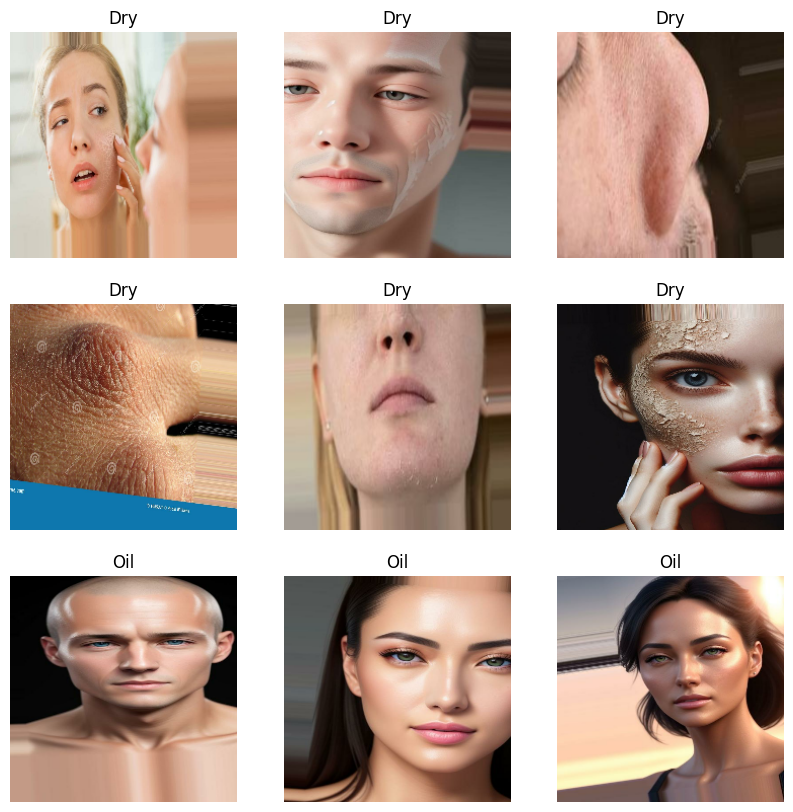

In [6]:
# Visualizing a sample of images from the training set
plt.figure(figsize=(10,10))
for image, labels in train_generator.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_classes[labels[i]])
        plt.axis('off')

In [7]:
# Building the neural network model
from tensorflow.keras.models import Sequential
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_classes))
                  
])

In [8]:
# Compiling the model

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [9]:
epochs_size =20
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs_size)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.5927 - loss: 1.4203 - val_accuracy: 0.6061 - val_loss: 1.0736
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step - accuracy: 0.7647 - loss: 0.4748 - val_accuracy: 0.6465 - val_loss: 0.9425
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.8225 - loss: 0.3895 - val_accuracy: 0.6768 - val_loss: 0.6719
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 197ms/step - accuracy: 0.8624 - loss: 0.3535 - val_accuracy: 0.7475 - val_loss: 1.7398
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 0.9175 - loss: 0.2361 - val_accuracy: 0.6465 - val_loss: 0.7734
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.9325 - loss: 0.1842 - val_accuracy: 0.6970 - val_loss: 1.1257
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - accuracy: 0.9686 - loss: 0.1299 - val_accuracy: 0.7273 - val_loss: 2.1856
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.9629 - loss: 0.1260 - val_accuracy: 0.

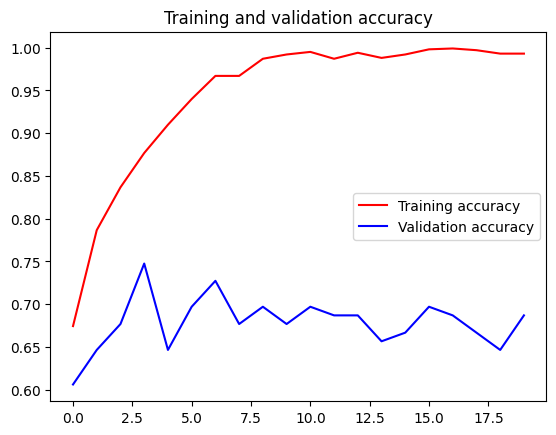

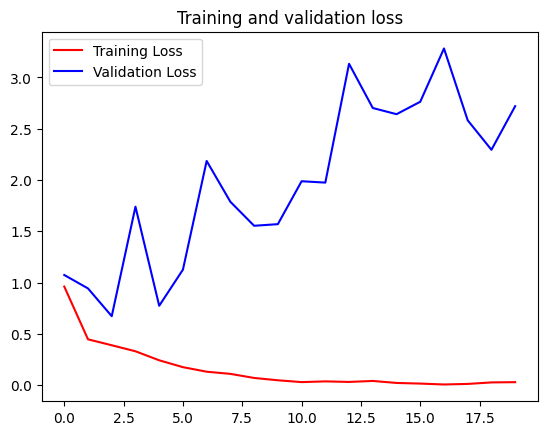

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
image = r"C:\Users\kbdsj\Desktop\Projects\OilyFaceDetection\Dataset\val\Oil\fk2.jpeg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [18]:
model.save('modelnew.h5')

In [19]:
from keras.models import load_model
loaded_model = load_model('modelnew.h5')


In [20]:
predict =loaded_model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [21]:
score = tf.nn.softmax(predict)

In [22]:
import numpy as np

predicted_class = data_classes[np.argmax(score)]
predicted_percentage = np.max(score)*100
other_class = data_classes[1 - np.argmax(score)]
other_percentage = 100 - predicted_percentage

print('The {} percentage in the image is {:0.2f}% and {} percentage is {:0.2f}%'.format(
    predicted_class, predicted_percentage, other_class, other_percentage))

The Dry percentage in the image is 98.76% and Oil percentage is 1.24%


In [4]:
import sys
print(sys.version)

3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]
